In [42]:
%pylab inline

import scipy
import pandas
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from scipy.fft import fftn
from scipy.fft import fftn
from scipy.signal import find_peaks
from scipy.fft import fftn, fftshift

import numpy as np
import matplotlib.animation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import clear_output
from scipy.signal import convolve2d
import math
import copy
from scipy.ndimage import  rotate
from scipy.fftpack import fft2
from matplotlib.colors import LogNorm
from skimage import transform
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy import interpolate
from scipy.fftpack import fft2
import sys
import os

import LoadNanonis 

#from LoadNanonis import nanonis_load
#from nanonis_load import sxm



matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['axes.labelsize'] = 12


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [43]:
from LoadNanonis.nanonis_load import sxm

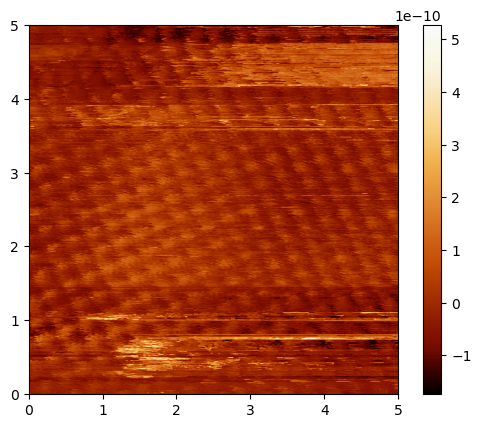

In [44]:

#Loading Data
imageData = sxm.sxm(r'FeSe_RawData/Topo/FeSe_0029.sxm')
imagePlot = sxm.plot(imageData, channel = 'Z (m)')


In [45]:

data2D = copy.deepcopy(imageData.data)
#data3D = np.transpose(data3D,(1,2,0))

In [60]:
# np.delete(data2D,0)

In [61]:
data2D

{'Z (m)': [array([[-8.1331144e-08, -8.1332360e-08, -8.1335706e-08, ...,
          -8.1334690e-08, -8.1350230e-08, -8.1325865e-08],
         [-8.1333027e-08, -8.1331613e-08, -8.1332416e-08, ...,
          -8.1325851e-08, -8.1315697e-08, -8.1302012e-08],
         [-8.1328203e-08, -8.1334285e-08, -8.1337603e-08, ...,
          -8.1288483e-08, -8.1289578e-08, -8.1294267e-08],
         ...,
         [-8.1399897e-08, -8.1400394e-08, -8.1400891e-08, ...,
          -8.1410406e-08, -8.1407244e-08, -8.1409361e-08],
         [-8.1363055e-08, -8.1366423e-08, -8.1371205e-08, ...,
          -8.1398660e-08, -8.1389281e-08, -8.1386418e-08],
         [-8.1386588e-08, -8.1376179e-08, -8.1375262e-08, ...,
          -8.1414825e-08, -8.1411493e-08, -8.1403158e-08]], dtype='>f4'),
  array([[-8.1331493e-08, -8.1332132e-08, -8.1333191e-08, ...,
          -8.1304208e-08, -8.1299625e-08, -8.1300541e-08],
         [-8.1331670e-08, -8.1337816e-08, -8.1348617e-08, ...,
          -8.1295475e-08, -8.1296989e-08, -8.

In [62]:
# Your goal is to get the data points for z -> plot them on a 5 by 5 nm grid as shown above, get a fourier transform of it, and find the lattice constants.

In [63]:
for key, value in data2D.items():
    print (key)
    for array in value:
        print(array)

Z (m)
[[-8.1331144e-08 -8.1332360e-08 -8.1335706e-08 ... -8.1334690e-08
  -8.1350230e-08 -8.1325865e-08]
 [-8.1333027e-08 -8.1331613e-08 -8.1332416e-08 ... -8.1325851e-08
  -8.1315697e-08 -8.1302012e-08]
 [-8.1328203e-08 -8.1334285e-08 -8.1337603e-08 ... -8.1288483e-08
  -8.1289578e-08 -8.1294267e-08]
 ...
 [-8.1399897e-08 -8.1400394e-08 -8.1400891e-08 ... -8.1410406e-08
  -8.1407244e-08 -8.1409361e-08]
 [-8.1363055e-08 -8.1366423e-08 -8.1371205e-08 ... -8.1398660e-08
  -8.1389281e-08 -8.1386418e-08]
 [-8.1386588e-08 -8.1376179e-08 -8.1375262e-08 ... -8.1414825e-08
  -8.1411493e-08 -8.1403158e-08]]
[[-8.1331493e-08 -8.1332132e-08 -8.1333191e-08 ... -8.1304208e-08
  -8.1299625e-08 -8.1300541e-08]
 [-8.1331670e-08 -8.1337816e-08 -8.1348617e-08 ... -8.1295475e-08
  -8.1296989e-08 -8.1294765e-08]
 [-8.1335230e-08 -8.1336431e-08 -8.1334498e-08 ... -8.1340602e-08
  -8.1327272e-08 -8.1306169e-08]
 ...
 [-8.1378360e-08 -8.1375454e-08 -8.1374083e-08 ... -8.1409276e-08
  -8.1408537e-08 -8.140525

In [64]:
c_array = data2D['Current (A)']
for array in c_array:
    print(array)

[[1.01723456e-10 9.96484492e-11 1.00249330e-10 ... 9.72840072e-11
  1.03018462e-10 1.09688293e-10]
 [1.00561531e-10 1.00015607e-10 1.02436379e-10 ... 1.03008081e-10
  1.04058914e-10 1.04629756e-10]
 [1.01071422e-10 1.00654166e-10 9.98457636e-11 ... 1.03359710e-10
  1.00114077e-10 9.82408391e-11]
 ...
 [9.94403240e-11 1.00222171e-10 1.00209278e-10 ... 9.88081353e-11
  1.00939639e-10 1.01376671e-10]
 [9.99078112e-11 9.92532792e-11 1.00031664e-10 ... 1.01135142e-10
  1.03381165e-10 1.00158208e-10]
 [1.02058147e-10 1.02561841e-10 9.83070847e-11 ... 1.01252520e-10
  1.04966411e-10 1.00891406e-10]]
[[1.00551796e-10 1.00620234e-10 1.00746002e-10 ... 9.87815663e-11
  9.82973633e-11 1.04210134e-10]
 [1.01022399e-10 1.04825801e-10 9.96553395e-11 ... 1.00282178e-10
  1.00423142e-10 1.01083551e-10]
 [1.01147583e-10 1.02351946e-10 9.91795604e-11 ... 1.01134962e-10
  9.47392095e-11 9.64682778e-11]
 ...
 [1.00179774e-10 9.99484731e-11 1.01232918e-10 ... 9.84437670e-11
  1.01908086e-10 1.00113876e-10]

In [83]:
list = []
for key in data2D.keys():
    if key == 'Z (m)':
        list().append(data2D.values())
print(list)

TypeError: 'list' object is not callable

In [84]:
Z_array = data2D['Z (m)']
for array in Z_array:
    print(array)

[[-8.1331144e-08 -8.1332360e-08 -8.1335706e-08 ... -8.1334690e-08
  -8.1350230e-08 -8.1325865e-08]
 [-8.1333027e-08 -8.1331613e-08 -8.1332416e-08 ... -8.1325851e-08
  -8.1315697e-08 -8.1302012e-08]
 [-8.1328203e-08 -8.1334285e-08 -8.1337603e-08 ... -8.1288483e-08
  -8.1289578e-08 -8.1294267e-08]
 ...
 [-8.1399897e-08 -8.1400394e-08 -8.1400891e-08 ... -8.1410406e-08
  -8.1407244e-08 -8.1409361e-08]
 [-8.1363055e-08 -8.1366423e-08 -8.1371205e-08 ... -8.1398660e-08
  -8.1389281e-08 -8.1386418e-08]
 [-8.1386588e-08 -8.1376179e-08 -8.1375262e-08 ... -8.1414825e-08
  -8.1411493e-08 -8.1403158e-08]]
[[-8.1331493e-08 -8.1332132e-08 -8.1333191e-08 ... -8.1304208e-08
  -8.1299625e-08 -8.1300541e-08]
 [-8.1331670e-08 -8.1337816e-08 -8.1348617e-08 ... -8.1295475e-08
  -8.1296989e-08 -8.1294765e-08]
 [-8.1335230e-08 -8.1336431e-08 -8.1334498e-08 ... -8.1340602e-08
  -8.1327272e-08 -8.1306169e-08]
 ...
 [-8.1378360e-08 -8.1375454e-08 -8.1374083e-08 ... -8.1409276e-08
  -8.1408537e-08 -8.1405254e-08]

In [92]:
matrix = []
for i in range(len(Z_array)):
    for row in range((len(Z_array))):    
        col = []
        for column in range(5):   
            col.append(Z_array(i))
        matrix.append(col)
    for row in range((len(Z_array)/2)):
        for column in range(5):
            print(matrix[row][column], end=" ")
        print()
    

TypeError: 'list' object is not callable